In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib as mpl
from matplotlib.colors import LogNorm  # Import LogNorm for logarithmic scaling
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
d = pd.read_csv('../tables/d.csv', parse_dates=['Time_Start', 'Time_Stop', 'Time_Mid'])
d['tot'] = d[['Org_AMS_STP', 'SO4_AMS_STP', 'NO3_AMS_STP', 'NH4_AMS_STP', 'Chl_AMS_STP']].sum(axis=1)
d['OMF'] = d['Org_AMS_STP']/d['tot']
d['s'] = (d.Time_Mid - d.Time_Mid.dt.normalize()).dt.total_seconds()


In [3]:
def pick_day(d, date_str):
    return d[d.Time_Start.dt.date==pd.Timestamp(date_str).date()]

In [4]:
def t_s(d, ax):


     # Create a colormap
    cmap = mpl.colormaps.get_cmap('rainbow_r')  # You can choose any colormap you like
    norm = LogNorm(vmin=d['Dp'].unique().min(), vmax=d['Dp'].unique().max())
    lab = ['SS', 'AmnSulf']
    ris = [1.5484, 1.530]
    cs = ['blue', 'red']
    samps = 2
    for j in range(samps):
        ax.text(x=(d.s.max()-d.s.min())*.02+d.s.min(), y=ris[j], s=lab[j], 
                va='top', ha='left')
        ax.axhline(ris[j], alpha=0.5, ls='--', color=cs[j])

    
    for dp in sorted(d['Dp'].unique()):
        dj = d[d.Dp==dp].copy()
        # Plot with seconds after midnight on the x-axis
        ax.scatter(dj.s, dj.RI, s=(dp/200)*2*15, color=cmap(norm(dp)), label = int(dp), alpha=0.7)

In [5]:
def t_s_resamp(d, ax, res):


     # Create a colormap
    cmap = mpl.colormaps.get_cmap('rainbow_r')  # You can choose any colormap you like
    norm = LogNorm(vmin=d['Dp'].unique().min(), vmax=d['Dp'].unique().max())
    lab = ['SS', 'AmnSulf']
    ris = [1.5484, 1.530]
    cs = ['blue', 'red']
    samps = 2
    for j in range(samps):
        ax.text(x=(d.s.max()-d.s.min())*.02+d.s.min(), y=ris[j], s=lab[j], 
                va='top', ha='left')
        ax.axhline(ris[j], alpha=0.5, ls='--', color=cs[j])

    
    for dp in sorted(d['Dp'].unique()):
        dj = d[d.Dp==dp].resample(res, on='Time_Mid').mean().copy()
        # Plot with seconds after midnight on the x-axis
        ax.scatter(dj.s, dj.RI, s=(dp/200)*2*15, color=cmap(norm(dp)), label = int(dp), alpha=0.7)

In [6]:
def t_s_resamp_line(d, ax, res):


     # Create a colormap
    cmap = mpl.colormaps.get_cmap('rainbow_r')  # You can choose any colormap you like
    norm = LogNorm(vmin=d['Dp'].unique().min(), vmax=d['Dp'].unique().max())
    lab = ['SS', 'AmnSulf']
    ris = [1.5484, 1.530]
    cs = ['blue', 'red']
    samps = 2
    for j in range(samps):
        ax.text(x=(d.s.max()-d.s.min())*.02+d.s.min(), y=ris[j], s=lab[j], 
                va='top', ha='left')
        ax.axhline(ris[j], alpha=0.5, ls='--', color=cs[j])

    
    for dp in sorted(d['Dp'].unique()):
        dj = d[d.Dp==dp].resample(res, on='Time_Mid').mean().copy()
        # Plot with seconds after midnight on the x-axis
        ax.plot(dj.s, dj.RI, color=cmap(norm(dp)), label = int(dp), alpha=0.7)

# Case 1 – cloud wall

In [7]:
d1 = pick_day(d, '2024-06-07')
d1 = d1[(d.s > 55100) & (d1.s < 61350)]

/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_50884/1756327242.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  d1 = d1[(d.s > 55100) & (d1.s < 61350)]


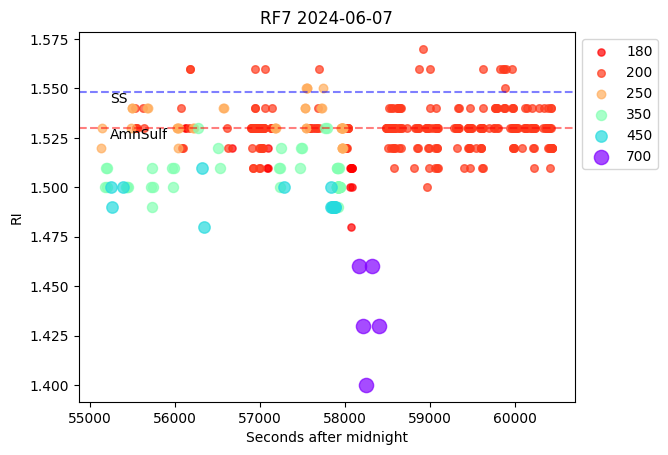

In [8]:
fig, ax = plt.subplots()
t_s(d1, ax)
ax.set_title('RF7 2024-06-07')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_xlabel('Seconds after midnight')
ax.set_ylabel('RI')
plt.savefig('../figures/1_ts.png', dpi=300, bbox_inches = 'tight')

"\nplt.xlabel('Category')\nplt.ylabel('RI')\nplt.title('Boxplots of RI for Different Categories')\nplt.xticks(rotation=30)\nplt.grid(axis='y', linestyle='--', alpha=0.7)\n"

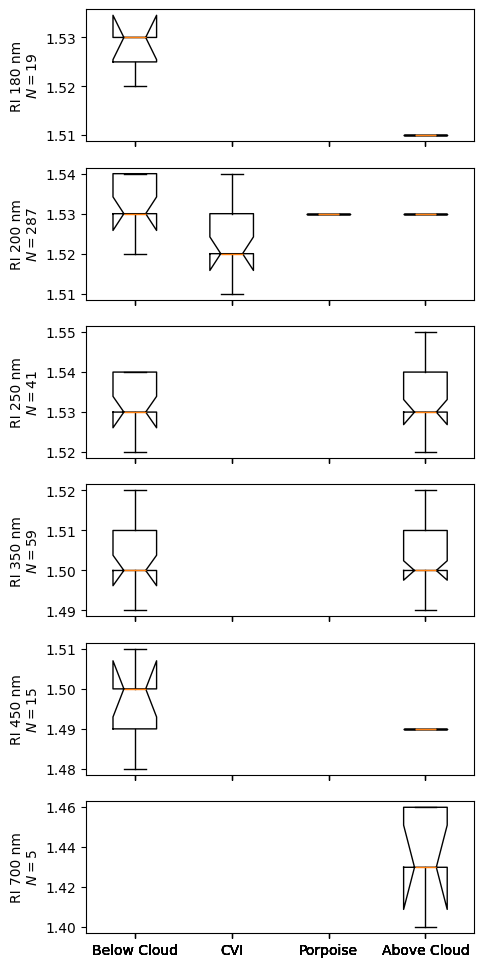

In [18]:
Dps = sorted(d1.Dp.unique())
fig,ax = plt.subplots(len(Dps), figsize=(5,2*len(Dps)), sharex=True)

for i in range(len(Dps)):
    di = d1[d1.Dp == Dps[i]].copy()

    # Define categories
    conditions = [
        (di['s'].between(55100, 56700)),
        (di['s'].between(60400, 61350)),
        (di['s'].between(58600, 60400)),
        (di['s'].between(56870, 58570))
        
    ]
    categories = ['Below Cloud', 'CVI', 'Porpoise', 'Above Cloud']


    # Assign category labels
    di['Category'] = None
    for j, condition in enumerate(conditions):
        di.loc[condition, 'Category'] = categories[j]

    # Prepare data for plotting
    data = [di.loc[di['Category'] == cat, 'RI'].dropna() for cat in categories]

    
    N = 0
    for j in range(4):
       N += len(data[j])

    ax[i].boxplot(data, tick_labels=categories, showfliers=False, notch=True)
    ax[i].set_ylabel('RI ' +  str(int(Dps[i])) + ' nm\n$N = $' + str(N))

fig.savefig('../figures/1_boxplots_all.png', dpi=300, bbox_inches='tight')
'''
plt.xlabel('Category')
plt.ylabel('RI')
plt.title('Boxplots of RI for Different Categories')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
'''

"\nplt.xlabel('Category')\nplt.ylabel('RI')\nplt.title('Boxplots of RI for Different Categories')\nplt.xticks(rotation=30)\nplt.grid(axis='y', linestyle='--', alpha=0.7)\n"

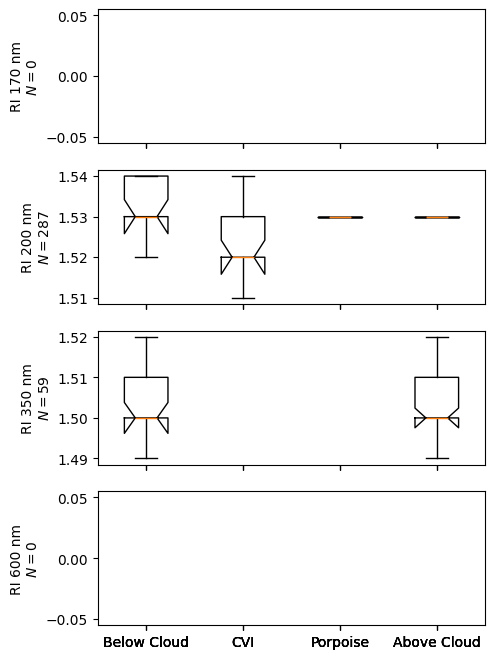

In [10]:
Dps = [170, 200, 350, 600]
fig,ax = plt.subplots(len(Dps), figsize=(5,2*len(Dps)), sharex=True)

for i in range(len(Dps)):
    di = d1[d1.Dp == Dps[i]].copy()

    # Define categories
    conditions = [
        (di['s'].between(55100, 56700)),
        (di['s'].between(60400, 61350)),
        (di['s'].between(58600, 60400)),
        (di['s'].between(56870, 58570))
        
    ]
    categories = ['Below Cloud', 'CVI', 'Porpoise', 'Above Cloud']


    # Assign category labels
    di['Category'] = None
    for j, condition in enumerate(conditions):
        di.loc[condition, 'Category'] = categories[j]

    # Prepare data for plotting
    data = [di.loc[di['Category'] == cat, 'RI'].dropna() for cat in categories]

    
    N = 0
    for j in range(4):
       N += len(data[j])

    ax[i].boxplot(data, tick_labels=categories, showfliers=False, notch=True)
    ax[i].set_ylabel('RI ' +  str(int(Dps[i])) + ' nm\n$N = $' + str(N))

fig.savefig('../figures/1_boxplots.png', dpi=300, bbox_inches='tight')
'''
plt.xlabel('Category')
plt.ylabel('RI')
plt.title('Boxplots of RI for Different Categories')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
'''

# Case 2 – Nares St

In [11]:
d2 = pick_day(d, '2024-05-28')
d2 = d2[(d2.s > 59000) & (d2.s < 65000)]

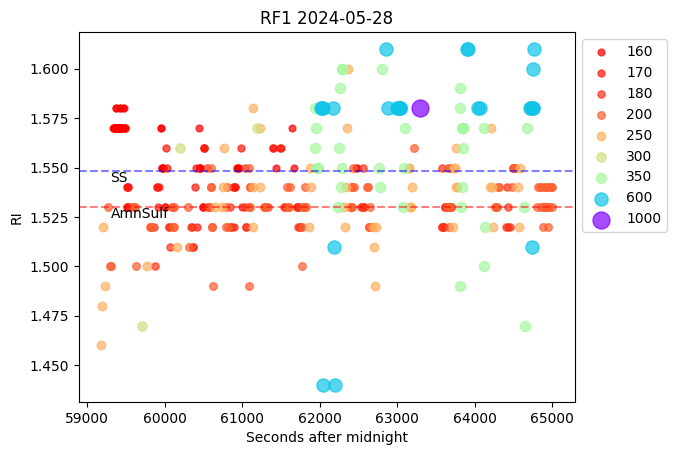

In [12]:
fig, ax = plt.subplots()
t_s(d2, ax)
ax.set_title('RF1 2024-05-28')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_xlabel('Seconds after midnight')
ax.set_ylabel('RI')
plt.savefig('../figures/2_ts.png', dpi=300, bbox_inches = 'tight')

# Case 3 – Villum
Jun 13 – 46254 to 51907\
Aug 01 – 47197 to 51154

In [13]:
d3a = pick_day(d, '2024-06-13')
d3a = d3a[(d3a.s > 46254) & (d3a.s < 51907)]

d3b = pick_day(d, '2024-08-01')
d3b = d3b[(d3b.s > 47197) & (d3b.s < 51154)]
d3 = [d3a, d3b]

In [14]:
for i in range(0,2):
    if i == 0:
        Dps = sorted(d3[i].Dp.unique())
    for j in range(len(Dps)):
        print(Dps[j], len(d3[i][d3[i].Dp == Dps[j]]))
    print('')

200.0 950
350.0 38

200.0 7
350.0 81



In [15]:
d3[i][d3[i].Dp == Dps[j]].GPS_Altitude

24176    5798.090909
24177    5797.272727
24178    5797.951872
24184    5810.363636
24185    5816.300000
            ...     
24258     288.932551
24259     212.891148
24260     159.816116
24268     147.413636
24274     106.689579
Name: GPS_Altitude, Length: 81, dtype: float64

/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_50884/3718542041.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = di.groupby('altitude_bin').agg(
/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_50884/3718542041.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = di.groupby('altitude_bin').agg(


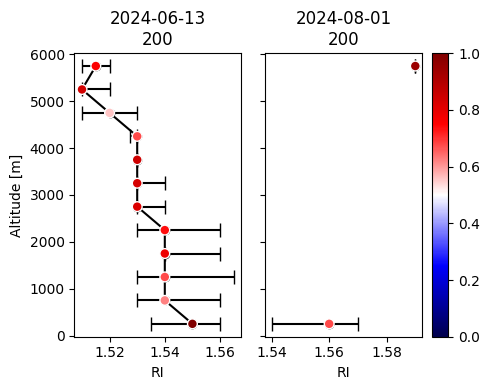

In [16]:
D = 200
fig,axes = plt.subplots(1,2, sharey=True, figsize=(5,4), width_ratios=[1, 1.1])
for i in range(2):
    di = d3[i][d3[i].Dp == D].copy()
    di['altitude_bin'] = pd.cut(di['GPS_Altitude'], bins=np.arange(0, di['GPS_Altitude'].max() + 500, 500))
    
    ax = axes[i]
    ax.set_title('2024-06-13\n'+ str(D) if i == 0 else '2024-08-01\n'+ str(D))

    grouped = di.groupby('altitude_bin').agg(
        count=('RI', 'count'),
        median_k_obs=('RI', 'median'),
        q25_k_obs=('RI', lambda x: np.nan if x.empty else np.quantile(x, 0.25)),
        q75_k_obs=('RI', lambda x: np.nan if x.empty else np.quantile(x, 0.75)),
        median_OMF=('OMF', 'mean')
    ).reset_index()
    # Extract the midpoint of each bin for plotting
    grouped['altitude_mid'] = grouped['altitude_bin'].apply(lambda x: x.mid)
    ax.errorbar(grouped['median_k_obs'], grouped['altitude_mid'], 
            xerr=[grouped['median_k_obs'] - grouped['q25_k_obs'], grouped['q75_k_obs'] - grouped['median_k_obs']], yerr=None, fmt='o', capsize=5, label='Median with 25-75% quantiles', ls='-', zorder=1, c='black')
    b = ax.scatter(grouped['median_k_obs'], grouped['altitude_mid'], c=grouped['median_OMF'], cmap='seismic', label='Median OMF', zorder=10, vmin = 0, vmax=1, linestyle='-', s=50, edgecolors='w')


    ax.set_xlabel('RI')
# Create a divider for the existing axes instance
divider = make_axes_locatable(axes[1])
cax = divider.append_axes("right", size="10%", pad=0.1)

# Create colorbar in the new axes
cbar = fig.colorbar(b, cax=cax)
axes[0].set_ylabel('Altitude [m]')
plt.tight_layout()
plt.savefig('../figures/3_alt_'+str(D)+'.png', dpi=300, bbox_inches = 'tight')

/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_50884/4128306824.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = di.groupby('altitude_bin').agg(
/Users/cassidysoloff/Documents/git/ARCSIX_DASH_RI/.venv/lib/python3.13/site-packages/matplotlib/cbook.py:1719: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_50884/4128306824.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = di.groupby('altitude_bin

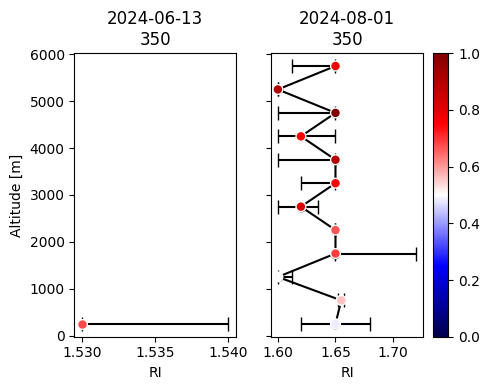

In [17]:
D = 350
fig,axes = plt.subplots(1,2, sharey=True, figsize=(5,4), width_ratios=[1, 1.1])
for i in range(2):
    di = d3[i][d3[i].Dp == D].copy()
    di['altitude_bin'] = pd.cut(di['GPS_Altitude'], bins=np.arange(0, di['GPS_Altitude'].max() + 500, 500))
    
    ax = axes[i]
    ax.set_title('2024-06-13\n'+ str(D) if i == 0 else '2024-08-01\n'+ str(D))

    grouped = di.groupby('altitude_bin').agg(
        count=('RI', 'count'),
        median_k_obs=('RI', 'median'),
        q25_k_obs=('RI', lambda x: np.nan if x.empty else np.quantile(x, 0.25)),
        q75_k_obs=('RI', lambda x: np.nan if x.empty else np.quantile(x, 0.75)),
        median_OMF=('OMF', 'mean')
    ).reset_index()
    # Extract the midpoint of each bin for plotting
    grouped['altitude_mid'] = grouped['altitude_bin'].apply(lambda x: x.mid)
    ax.errorbar(grouped['median_k_obs'], grouped['altitude_mid'], 
            xerr=[grouped['median_k_obs'] - grouped['q25_k_obs'], grouped['q75_k_obs'] - grouped['median_k_obs']], yerr=None, fmt='o', capsize=5, label='Median with 25-75% quantiles', ls='-', zorder=1, c='black')
    b = ax.scatter(grouped['median_k_obs'], grouped['altitude_mid'], c=grouped['median_OMF'], cmap='seismic', label='Median OMF', zorder=10, vmin = 0, vmax=1, linestyle='-', s=50, edgecolors='w')


    ax.set_xlabel('RI')
# Create a divider for the existing axes instance
divider = make_axes_locatable(axes[1])
cax = divider.append_axes("right", size="10%", pad=0.1)

# Create colorbar in the new axes
cbar = fig.colorbar(b, cax=cax)
axes[0].set_ylabel('Altitude [m]')
plt.tight_layout()
plt.savefig('../figures/3_alt_'+str(D)+'.png', dpi=300, bbox_inches = 'tight')

/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_50884/2143442832.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = di.groupby('altitude_bin').agg(
/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_50884/2143442832.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = di.groupby('altitude_bin').agg(


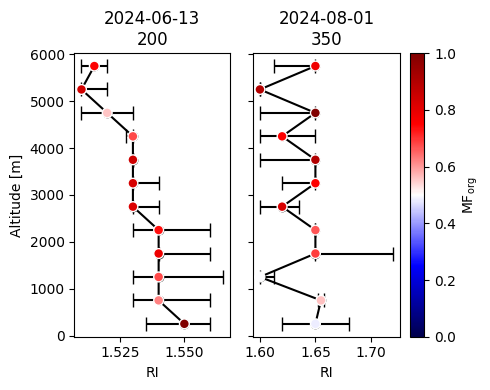

In [34]:
D = [200,350]
fig,axes = plt.subplots(1,2, sharey=True, figsize=(5,4), width_ratios=[1, 1.1])
for i in range(2):
    di = d3[i][d3[i].Dp == D[i]].copy()
    di['altitude_bin'] = pd.cut(di['GPS_Altitude'], bins=np.arange(0, di['GPS_Altitude'].max() + 500, 500))
    
    ax = axes[i]
    ax.set_title('2024-06-13\n'+ str(D[i]) if i == 0 else '2024-08-01\n'+ str(D[i]))

    grouped = di.groupby('altitude_bin').agg(
        count=('RI', 'count'),
        median_k_obs=('RI', 'median'),
        q25_k_obs=('RI', lambda x: np.nan if x.empty else np.quantile(x, 0.25)),
        q75_k_obs=('RI', lambda x: np.nan if x.empty else np.quantile(x, 0.75)),
        median_OMF=('OMF', 'mean')
    ).reset_index()
    # Extract the midpoint of each bin for plotting
    grouped['altitude_mid'] = grouped['altitude_bin'].apply(lambda x: x.mid)
    ax.errorbar(grouped['median_k_obs'], grouped['altitude_mid'], 
            xerr=[grouped['median_k_obs'] - grouped['q25_k_obs'], grouped['q75_k_obs'] - grouped['median_k_obs']], yerr=None, fmt='o', capsize=5, label='Median with 25-75% quantiles', ls='-', zorder=1, c='black')
    b = ax.scatter(grouped['median_k_obs'], grouped['altitude_mid'], c=grouped['median_OMF'], cmap='seismic', label='Median OMF', zorder=10, vmin = 0, vmax=1, linestyle='-', s=50, edgecolors='w')


    ax.set_xlabel('RI')
# Create a divider for the existing axes instance
divider = make_axes_locatable(axes[1])
cax = divider.append_axes("right", size="10%", pad=0.1)

# Create colorbar in the new axes
cbar = fig.colorbar(b, cax=cax)
cbar.set_label(r'MF$_{\rm org}$')
axes[0].set_ylabel('Altitude [m]')
plt.tight_layout()
plt.savefig('../figures/3_alt_comb.png', dpi=300, bbox_inches = 'tight')

# Case 4 – Volcano

In [22]:
d4a = pick_day(d, '2024-06-03')

d4b = pick_day(d, '2024-06-05')

d4c = pick_day(d, '2024-06-06')

d4 = [d4a, d4b, d4c]

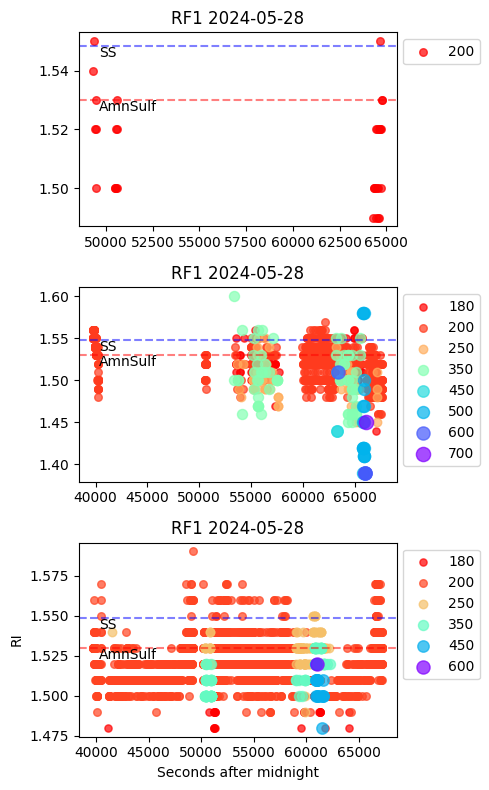

In [ ]:
fig, axes = plt.subplots(3, figsize=(5, 8))
for i in range(3):
    ax = axes[i]
    t_s(d4[i], ax)
    ax.set_title('RF1 2024-05-28')
    ax.legend(bbox_to_anchor=(1, 1))
ax.set_xlabel('Seconds after midnight')
ax.set_ylabel('RI')
plt.tight_layout()
#plt.savefig('../figures/2_ts.png', dpi=300, bbox_inches = 'tight')

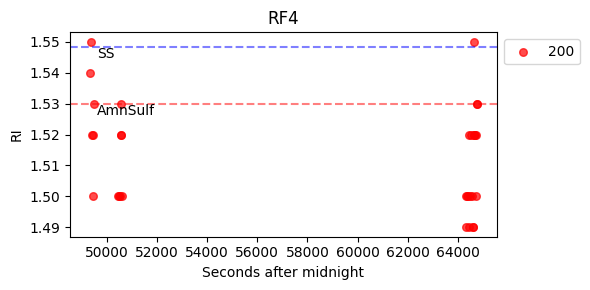

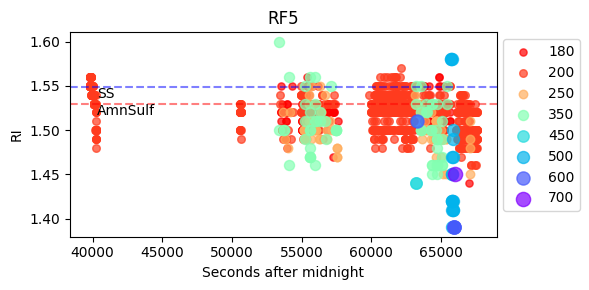

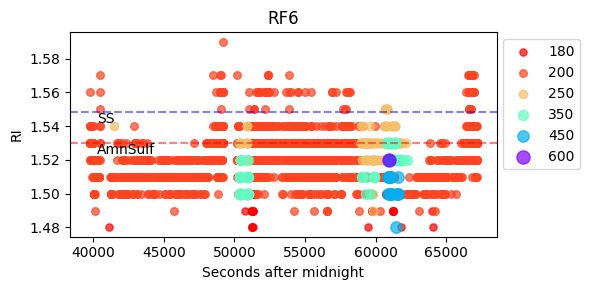

In [33]:
day = ['RF4', 'RF5', 'RF6']
for i in range(3):
    fig, ax = plt.subplots(figsize=(6, 3))
    t_s(d4[i], ax)
    ax.set_title(day[i])
    ax.legend(bbox_to_anchor=(1, 1))
    ax.set_xlabel('Seconds after midnight')
    ax.set_ylabel('RI')
    plt.tight_layout()
    plt.savefig('../figures/4_ts'+day[i]+'.png', dpi=300, bbox_inches = 'tight')